In [ ]:
import os
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.nddata import CCDData
from astropy.io import fits as fits
import astroscrappy
from ccdproc import ImageFileCollection
import ccdproc
from stdpipe import astrometry, photometry, catalogs, cutouts, templates, subtraction, plots, psf, pipeline, utils
import matplotlib.pyplot as plt
from astroquery.astrometry_net import AstrometryNet
from astropy.visualization import PercentileInterval, ImageNormalize
from astropy.wcs import WCS

In [ ]:
plt.rc('image', origin='lower', cmap='gray')

In [ ]:
indir='/content/drive/MyDrive/M57/20240419/'
print('indir:', indir)

outdir ='/content/drive/MyDrive/Reduction/'
os.makedirs(outdir, exist_ok=True)  # Create directory if it doesn't exist
print('outdir:', outdir)

dir_name = '20240419'
print('dir_name:', dir_name)

indir: /content/drive/MyDrive/M57/20240419/
outdir: /content/drive/MyDrive/Reduction/
dir_name: 20240419


In [ ]:
#create a list of all frames in the data folder using imagefilecollection in ccdproc
#create columns of all keywords in the headers
ic = ImageFileCollection(indir, keywords='*')
print('ic:', ic)

#sorting the files according to (two keywords)
ic.sort(['date_obs', 'ut'])

#list the columns (keywords) in the files
print(ic.summary.colnames)

#create table of keywords and their values
mytable = ic.summary

#save the table as a csv file
mytable.write('%s_obslog_table.csv' %(dir_name), format='csv', overwrite=True)

ic: ImageFileCollection(location='/content/drive/MyDrive/M57/20240419/')
['file', 'simple', 'bitpix', 'naxis', 'naxis1', 'naxis2', 'observer', 'notes', 'date_obs', 'ut', 'exptime', 'ccd_temp', 'focus', 'filter', 'calibrat', 'lamp', 'im_style', 'object', 'ra', 'dec', 'mask', 'grsmname', 'grism', 'ha', 'sidereal', 'j_date', 'sec_z', 'ra_trck', 'dec_trck', 'epoch', 'dome_az', 'rotator', 'callim', 'collim', 'colpos', 'guslim', 'guspos', 'guilim', 'guipos', 'masklim', 'maskpos', 'slwlim', 'slwpos', 'slllim', 'sllpos', 'sfolim', 'sfopos', 'qurtbeam', 'qurtblim', 'qurtpos', 'halfbeam', 'halfblim', 'halfpos', 'prsmbeam', 'prsmblim', 'fwheels', 'wheel1', 'whl1name', 'wheel2', 'whl2name', 'readout', 'origin', 'telescop', 'seeing', 'instrume', 'pixscale', 'latitude', 'software', 'longitud', 'altitude', 'binx', 'biny', 'xstart', 'xend', 'ystart', 'yend', 'frameid', 'bscale', 'bzero', 'comment']


In [ ]:
# Load the saved CSV file
csv_path = f"{dir_name}_obslog_table.csv"
obslog_table = pd.read_csv(csv_path)

# Display the full table in the notebook
pd.set_option('display.max_rows', None)  # Show all rows (optional)
pd.set_option('display.max_columns', None)  # Show all columns (optional)
display(obslog_table)  # For Jupyter Notebook


file  simple  bitpix  naxis  naxis1  naxis2     observer  \
0   20240419_0001.fits    True      16      2    1024    1024  CU Students   
1   20240419_0002.fits    True      16      2    1024    1024  CU Students   
2   20240419_0003.fits    True      16      2    1024    1024  CU Students   
3   20240419_0004.fits    True      16      2    1024    1024  CU Students   
4   20240419_0005.fits    True      16      2    1024    1024  CU Students   
5   20240419_0006.fits    True      16      2    1024    1024  CU Students   
6   20240419_0007.fits    True      16      2    1024    1024  CU Students   
7   20240419_0008.fits    True      16      2    1024    1024  CU Students   
8   20240419_0009.fits    True      16      2    1024    1024  CU Students   
9   20240419_0010.fits    True      16      2    1024    1024  CU Students   
10  20240419_0052.fits    True      16      2    1024    1024  CU Students   
11  20240419_0053.fits    True      16      2    1024    1024  CU Students   
12  20240419_0054.fits    True      16      2    1024    1024  CU Students   
13  20240419_0055.fits    True      16      2    1024    1024  CU Students   
14  20240419_0056.fits    True      16      2    1024    1024  CU Students   
15  20240419_0057.fits    True      16      2    1024    1024  CU Students   
16  20240419_0122.fits    True      16      2    1024    1024  CU Students   
17  20240419_0123.fits    True      16      2    1024    1024  CU Students   
18  20240419_0124.fits    True      16      2    1024    1024  CU Students   
19  20240419_0125.fits    True      16      2    1024    1024  CU Students   
20  20240419_0126.fits    True      16      2    1024    1024  CU Students   
21  20240419_0127.fits    True      16      2    1024    1024  CU Students   
22  20240419_0128.fits    True      16      2    1024    1024  CU Students   
23  20240419_0129.fits    True      16      2    1024    1024  CU Students   
24  20240419_0130.fits    True      16      2    1024    1024  CU Students   
25  20240419_0131.fits    True      16      2    1024    1024  CU Students   
26  20240419_0132.fits    True      16      2    1024    1024  CU Students   
27  20240419_0133.fits    True      16      2    1024    1024  CU Students   
28  20240419_0134.fits    True      16      2    1024    1024  CU Students   
29  20240419_0135.fits    True      16      2    1024    1024  CU Students   
30  20240419_0136.fits    True      16      2    1024    1024  CU Students   
31  20240419_0137.fits    True      16      2    1024    1024  CU Students   
32  20240419_0138.fits    True      16      2    1024    1024  CU Students   
33  20240419_0139.fits    True      16      2    1024    1024  CU Students   
34  20240419_0140.fits    True      16      2    1024    1024  CU Students   
35  20240419_0141.fits    True      16      2    1024    1024  CU Students   
36  20240419_0142.fits    True      16      2    1024    1024  CU Students   
37  20240419_0143.fits    True      16      2    1024    1024  CU Students   
38  20240419_0144.fits    True      16      2    1024    1024  CU Students   
39  20240419_0145.fits    True      16      2    1024    1024  CU Students   
40  20240419_0146.fits    True      16      2    1024    1024  CU Students   
41  20240419_0147.fits    True      16      2    1024    1024  CU Students   
42  20240419_0148.fits    True      16      2    1024    1024  CU Students   
43  20240419_0149.fits    True      16      2    1024    1024  CU Students   
44  20240419_0150.fits    True      16      2    1024    1024  CU Students   
45  20240419_0151.fits    True      16      2    1024    1024  CU Students   
46  20240419_0152.fits    True      16      2    1024    1024  CU Students   
47  20240419_0153.fits    True      16      2    1024    1024  CU Students   
48  20240419_0154.fits    True      16      2    1024    1024  CU Students   
49  20240419_0155.fits    True      16      2    1024    1024  CU Students   
50  20240419_0156.fits    True      16  

In [ ]:
#exclude N rows (sheilding by guide camera)
#rows with no problems
y1 = 11
y2 = 1011

#exclude N columns
#columns with no problems
x1 = 11
x2 = 1011

frame: /content/drive/MyDrive/M57/20240419/20240419_0001.fits


a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


image shape:  (1024, 1024)
image shape:  (1000, 1000)
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


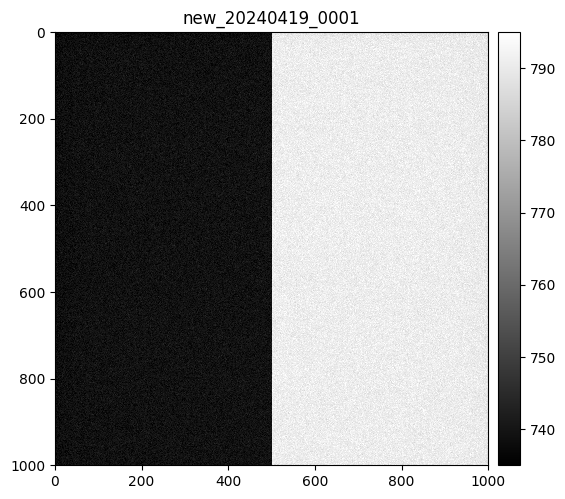

frame: /content/drive/MyDrive/M57/20240419/20240419_0002.fits


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


image shape:  (1024, 1024)
image shape:  (1000, 1000)
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


<Figure size 640x480 with 0 Axes>

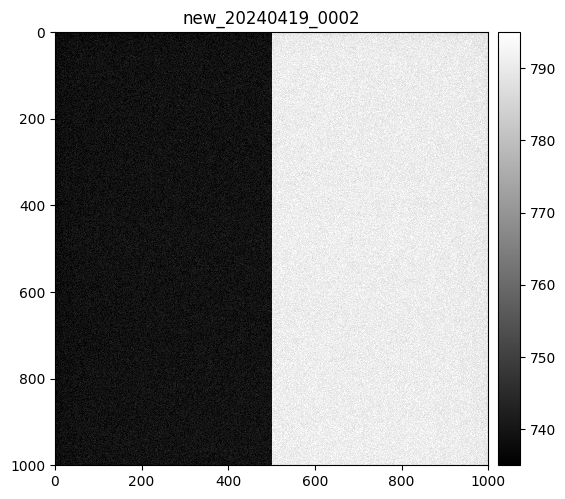

frame: /content/drive/MyDrive/M57/20240419/20240419_0003.fits


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


image shape:  (1024, 1024)
image shape:  (1000, 1000)
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


<Figure size 640x480 with 0 Axes>

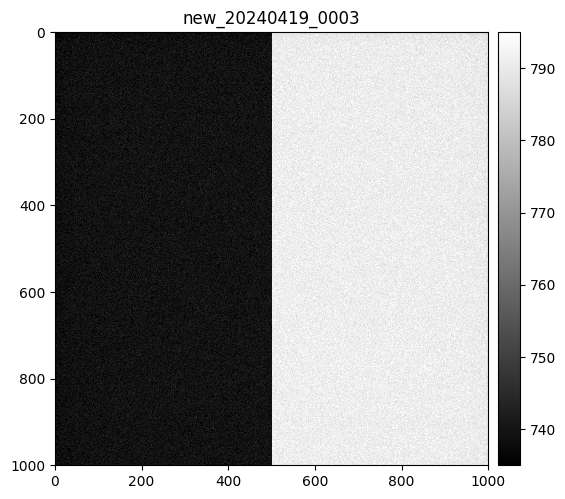

frame: /content/drive/MyDrive/M57/20240419/20240419_0004.fits


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


image shape:  (1024, 1024)
image shape:  (1000, 1000)
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


<Figure size 640x480 with 0 Axes>

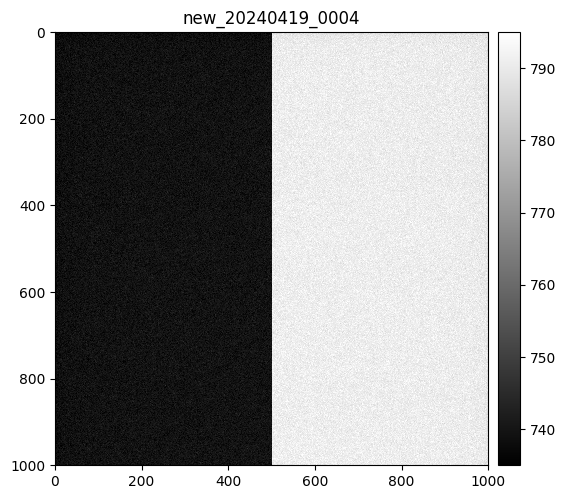

frame: /content/drive/MyDrive/M57/20240419/20240419_0005.fits


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


image shape:  (1024, 1024)
image shape:  (1000, 1000)
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


<Figure size 640x480 with 0 Axes>

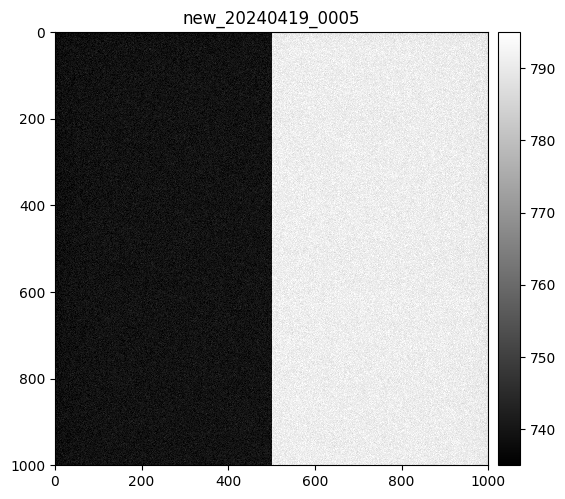

frame: /content/drive/MyDrive/M57/20240419/20240419_0006.fits


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


image shape:  (1024, 1024)
image shape:  (1000, 1000)
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


<Figure size 640x480 with 0 Axes>

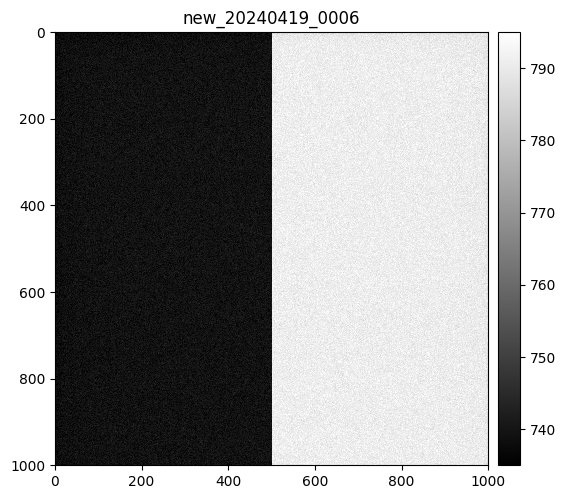

frame: /content/drive/MyDrive/M57/20240419/20240419_0007.fits


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


image shape:  (1024, 1024)
image shape:  (1000, 1000)
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


<Figure size 640x480 with 0 Axes>

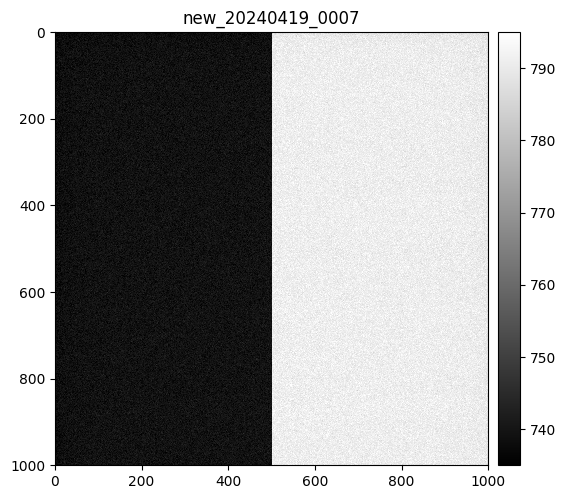

frame: /content/drive/MyDrive/M57/20240419/20240419_0008.fits


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


image shape:  (1024, 1024)
image shape:  (1000, 1000)
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


<Figure size 640x480 with 0 Axes>

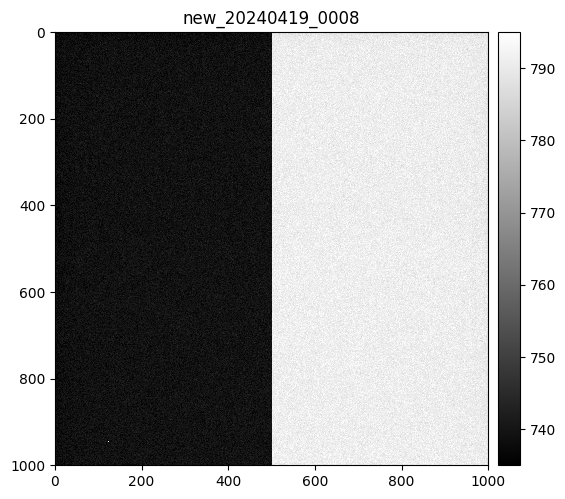

frame: /content/drive/MyDrive/M57/20240419/20240419_0009.fits


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


image shape:  (1024, 1024)
image shape:  (1000, 1000)
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


<Figure size 640x480 with 0 Axes>

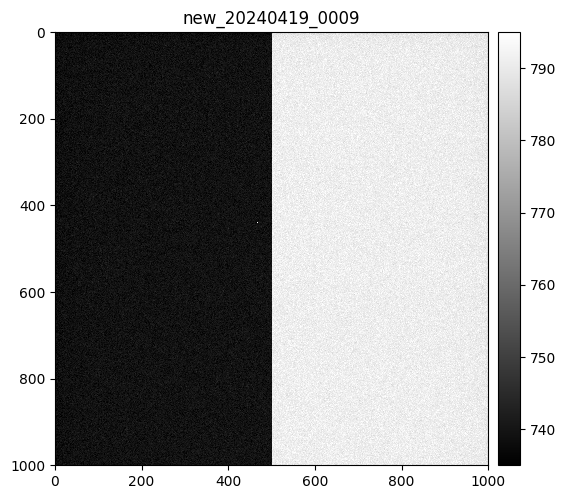

frame: /content/drive/MyDrive/M57/20240419/20240419_0010.fits


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


image shape:  (1024, 1024)
image shape:  (1000, 1000)
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


<Figure size 640x480 with 0 Axes>

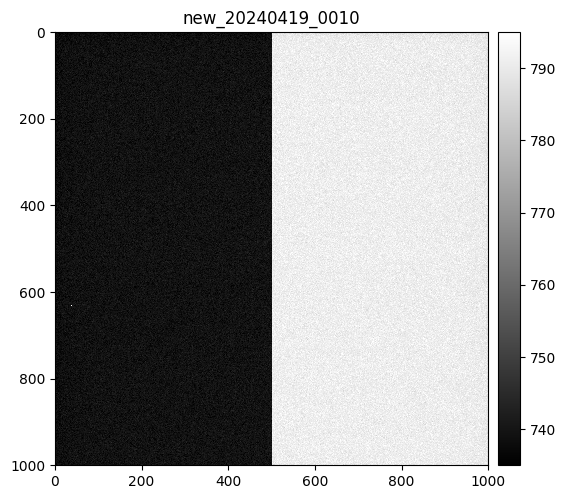

<Figure size 640x480 with 0 Axes>

In [ ]:
#create a bias list
bias_list= []
filename_list = []

#loop over the file list
for filename in ic.files_filtered(im_style='Bias'):

    #redefine the image name
    frame = ic.location+filename
    print('frame:', frame)

    #Read the data of the fits file as CCDData object
    ccd = CCDData.read(frame, unit = u.adu)
    print("image shape: ", ccd.shape)

    #trim the image from problematic columns and rows
    ccd = ccdproc.trim_image(ccd[y1:y2, x1:x2], add_keyword=True)
    print("image shape: ", ccd.shape)

    #write the trimmed image as a new fits file
    ccd.write('new_%s'%filename, overwrite=True)

    #open the new fits file with ccd modules
    ccd_new = CCDData.read('new_%s' %filename, unit = u.adu)

    #add the new image to the bias list
    bias_list.append(ccd_new)
    filename_list.append(filename[:-5])

    # plot the images
    # Read the image and its header
    # Convert to floating point for easier work later
    image = fits.getdata('new_%s' %filename).astype(np.double)
    header = fits.getheader('new_%s' %filename)
    plt.figure(figsize=(6, 6))
    plots.imshow(image, [0.5, 99.7], interpolation='nearest')
    plt.xlim(0, 1000)
    plt.ylim(1000, 0)
    plt.title('new_%s' %filename[:-5])
    plt.savefig('new_%s' %filename[:-5])
    plt.show()
    plt.clf()

                         
len(bias_list):  10
len(filename_list):  10
filename_list:  ['20240419_0001', '20240419_0002', '20240419_0003', '20240419_0004', '20240419_0005', '20240419_0006', '20240419_0007', '20240419_0008', '20240419_0009', '20240419_0010']
                         
Combining bias frames ...
                         
Done                     
                         


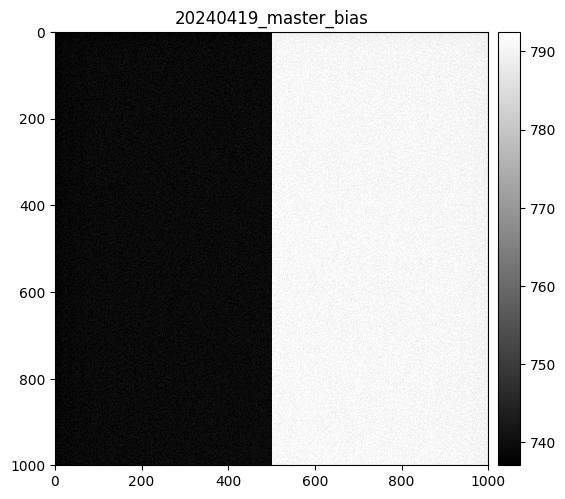

<Figure size 640x480 with 0 Axes>

In [ ]:
#number of bias frames
print('                         ')
#print('bias_list: ', bias_list)
print('len(bias_list): ', len(bias_list))

print('len(filename_list): ', len(filename_list))
print('filename_list: ', filename_list)

print('                         ')
print('Combining bias frames ...')

#create the master bias
master_bias = ccdproc.combine(bias_list, method='median')
#master_bias = ccdproc.combine(bias_list[0:9], method='median')
print('                         ')
print('Done                     ')
print('                         ')

#write the final frame as a fits file
master_bias.write('%s_master_bias.fits' %(dir_name), overwrite=True)

#move the new bias frames to another dir
os.system('mv new_* %s' %(outdir))

# plot the images
# Read the image and its header
# Convert to floating point for easier work later
image = fits.getdata('%s_master_bias.fits' %(dir_name)).astype(np.double)
header = fits.getheader('%s_master_bias.fits' %(dir_name))
plt.figure(figsize=(6, 6))
plots.imshow(image, [0.5, 99.7], interpolation='nearest')
plt.xlim(0, 1000)
plt.ylim(1000, 0)
plt.title('%s_master_bias' %(dir_name))
plt.savefig('%s_master_bias' %(dir_name))
plt.show()
plt.clf()


In [ ]:
master_bias = CCDData.read('%s_master_bias.fits' %(dir_name), unit = u.adu)

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


In [ ]:
filter_name = 'V'
print('filter_name: ', filter_name)

filter_name:  V


In [ ]:
#define the exposure time
exposure_time = 14.50

frame: /content/drive/MyDrive/M57/20240419/20240419_0127.fits


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


image shape:  (1024, 1024)
image shape:  (1000, 1000)
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
ccd_new_mean 24152


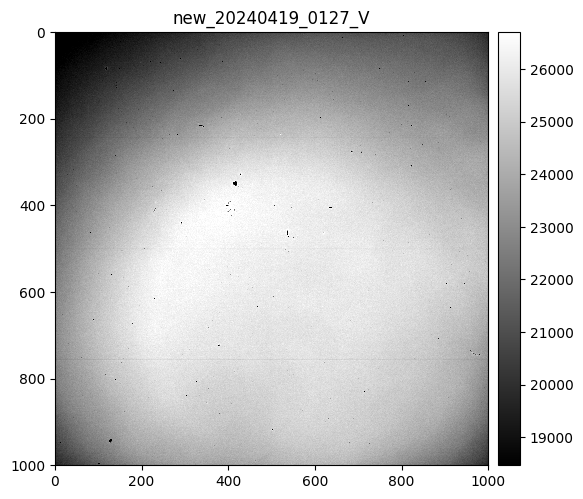

frame: /content/drive/MyDrive/M57/20240419/20240419_0128.fits


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


image shape:  (1024, 1024)
image shape:  (1000, 1000)
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
ccd_new_mean 24165


<Figure size 640x480 with 0 Axes>

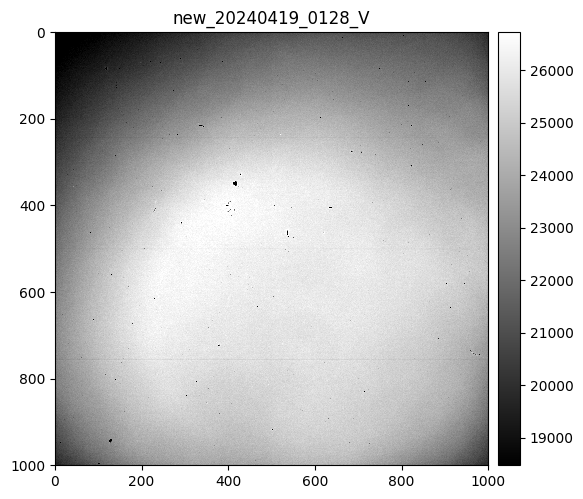

frame: /content/drive/MyDrive/M57/20240419/20240419_0129.fits


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


image shape:  (1024, 1024)
image shape:  (1000, 1000)
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
ccd_new_mean 24179


<Figure size 640x480 with 0 Axes>

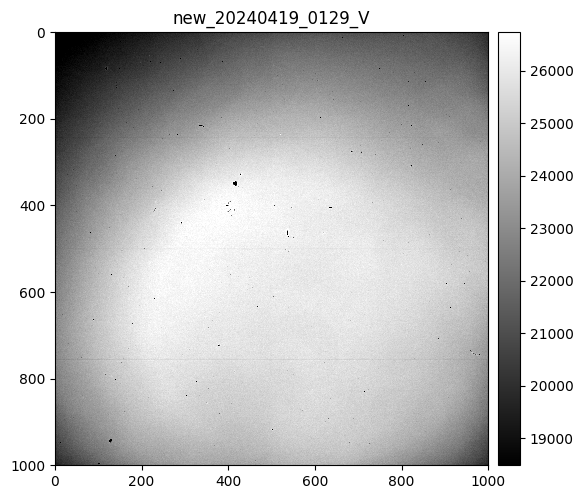

frame: /content/drive/MyDrive/M57/20240419/20240419_0130.fits


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


image shape:  (1024, 1024)
image shape:  (1000, 1000)
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
ccd_new_mean 24189


<Figure size 640x480 with 0 Axes>

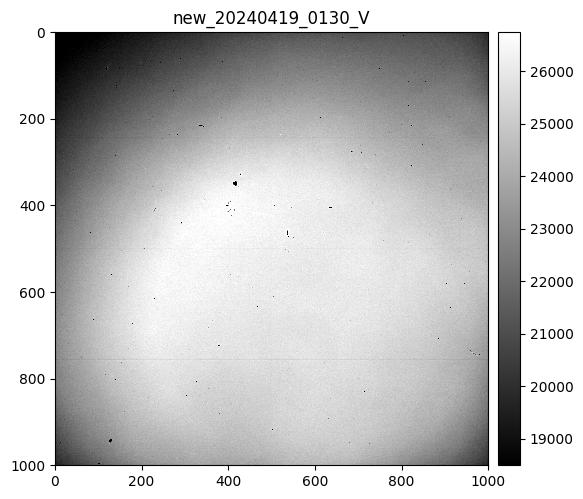

frame: /content/drive/MyDrive/M57/20240419/20240419_0131.fits


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


image shape:  (1024, 1024)
image shape:  (1000, 1000)
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
ccd_new_mean 24202


<Figure size 640x480 with 0 Axes>

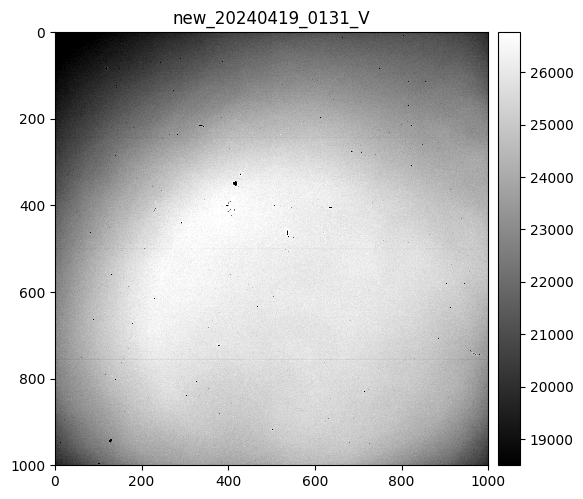

<Figure size 640x480 with 0 Axes>

In [ ]:
#create a list from flat field frames with thier scales (mean)
flat_filter_list  = []
scale_factor_list = []

#loop over the file list
for filename in ic.files_filtered(im_style='Light',
                                  exptime='%s'%exposure_time,
                                  filter= filter_name):

    #redefine the image name
    frame = ic.location+filename
    print('frame:', frame)

    #Read the data of the fits file as CCDData object
    ccd = CCDData.read(frame, unit = u.adu)
    print("image shape: ", ccd.shape)

    #trim the image from problematic columns and rows
    ccd = ccdproc.trim_image(ccd[y1:y2, x1:x2], add_keyword=True)
    print("image shape: ", ccd.shape)

    #write the trimmed image as a new fits file
    ccd.write('new_%s'%filename, overwrite=True)

    #open the new fits file with ccd modules
    ccd_new = CCDData.read('new_%s' %filename, unit = u.adu)

    #exclude images with low OR saturated pixels
    #mean_value = int(round(np.mean(ccd_new), 0))
    mean_value = int(round(np.mean(ccd_new.data), 0))
    print('ccd_new_mean', mean_value)

    #if (20000. < mean_value < 50000.):

    #subtract master bias
    ccd_new = ccdproc.subtract_bias(ccd_new, master_bias)

    #create the scale list
    scale_factor_list.append(1.0/mean_value)

    #create a list
    flat_filter_list.append(ccd_new)

    # plot the images
    # Read the image and its header
    # Convert to floating point for easier work later
    image = fits.getdata('new_%s' %filename).astype(np.double)
    header = fits.getheader('new_%s' %filename)
    plt.figure(figsize=(6, 6))
    plots.imshow(image, [0.5, 99.7], interpolation='nearest')
    plt.xlim(0, 1000)
    plt.ylim(1000, 0)
    plt.title('new_%s_%s' %(filename[:-5],filter_name))
    plt.savefig('new_%s' %filename[:-5])
    plt.show()
    plt.clf()

                         
len(flat_filter_list):    5
len(scale_factor_list):   5
                         
Combining flat frames ...
                         
Done                     
                         


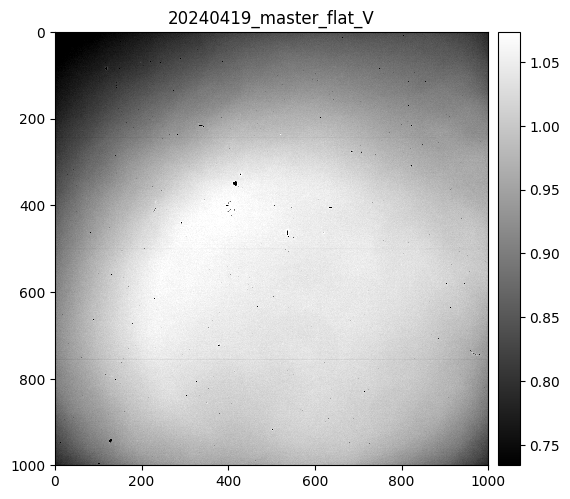

<Figure size 640x480 with 0 Axes>

In [ ]:
#number of flat field frames
print('                         ')
print("len(flat_filter_list):   ", len(flat_filter_list))
print("len(scale_factor_list):  ", len(scale_factor_list))
print('                         ')
print('Combining flat frames ...')

#create the master flat
master_flat = ccdproc.combine(flat_filter_list,
                              method='median',
                              scale=scale_factor_list)

print('                         ')
print('Done                     ')
print('                         ')

#write the final frame as a fits file
master_flat.write('%s_master_flat_%s.fits'%(dir_name, filter_name), overwrite=True)

#move the new flat frames to another dir
os.system('mv new_* %s' %(outdir))

# plot the images
# Read the image and its header
# Convert to floating point for easier work later
image = fits.getdata('%s_master_flat_%s.fits' %(dir_name,filter_name)).astype(np.double)
header = fits.getheader('%s_master_flat_%s.fits' %(dir_name,filter_name))
plt.figure(figsize=(6, 6))
plots.imshow(image, [0.5, 99.7], interpolation='nearest')
plt.xlim(0, 1000)
plt.ylim(1000, 0)
plt.title('%s_master_flat_%s' %(dir_name,filter_name))
plt.savefig('%s_master_flat_%s' %(dir_name,filter_name))
plt.show()
plt.clf()


In [ ]:
master_flat = CCDData.read('%s_master_flat_%s.fits'%(dir_name, filter_name), unit = u.adu)

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


In [ ]:
#define the exposure time
exposure_time = 60.0

#write the object name as in the fits header
object_name = 'M57'

filename:  20240419_0054.fits
frame: /content/drive/MyDrive/M57/20240419/20240419_0054.fits


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


image shape:  (1024, 1024)
image shape:  (1000, 1000)
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
Cosmic Rays removed


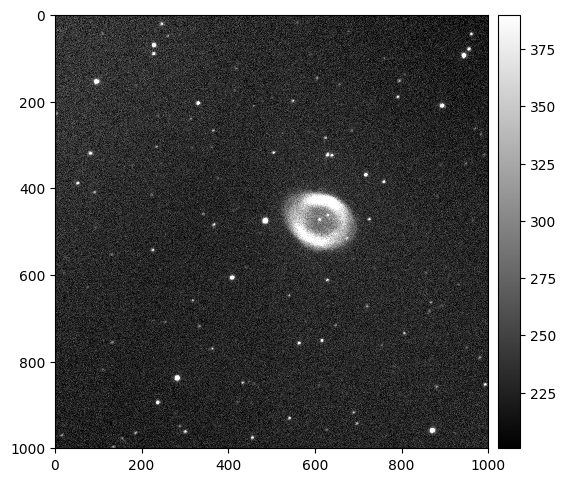

len(obj_filter_list): 1
                         
len(filename_list):  1
filename_list:  ['20240419_0054']


0

In [ ]:
obj_filter_list = []
filename_list = []

for filename in ic.files_filtered(im_style='Light',
                                  object='%s' % object_name,
                                  exptime='%s' % exposure_time,
                                  filter=filter_name):
    print('filename: ', filename)

    # Redefine the image name
    frame = ic.location + filename
    print('frame:', frame)

    # Read the data of the fits file as CCDData object
    ccd = CCDData.read(frame, unit=u.adu)
    print("image shape: ", ccd.shape)

    # Trim the image from problematic columns and rows
    ccd = ccdproc.trim_image(ccd[y1:y2, x1:x2], add_keyword=True)
    print("image shape: ", ccd.shape)

    # Write the trimmed image as a new fits file
    ccd.write('new_%s' % filename, overwrite=True)

    # Open the new fits file with CCD modules
    ccd_new = CCDData.read('new_%s' % filename, unit=u.adu)

    # Subtract master bias
    ccd_new = ccdproc.subtract_bias(ccd_new, master_bias)

    # Correct for flat field
    ccd_new = ccdproc.flat_correct(ccd_new, master_flat)

    # Convert CCDData object to numpy array for cosmic ray removal
    image_data = ccd_new.data
    header = ccd_new.header

    # Remove cosmic rays
    crmask, cleaned_data = astroscrappy.detect_cosmics(
        indat=image_data,
        sigclip=4.5,
        sigfrac=0.3,
        objlim=5.0,
        gain=2.14,  # Adjust gain if known
        readnoise=6.5,
        satlevel=65536.0,
        niter=10,
        sepmed=True,
        cleantype='meanmask',
        fsmode='median',
        psfmodel='gauss',
        psffwhm=2.5,
        psfsize=7,
        verbose=False
    )

    # Add a comment to the header about cosmic ray removal
    header['COMMENT'] = 'Cosmic rays removed using astroscrappy.'

    # Save the cleaned image with the updated header
    cleaned_frame = '%s_' % filter_name + filename
    fits.writeto(cleaned_frame, cleaned_data, header=header, overwrite=True)

    print('Cosmic Rays removed')

    # Append the cleaned image to the list of corrected science frames
    obj_filter_list.append(ccd_new)
    filename_list.append(filename[:-5])

    # Load the cleaned image for plotting
    image = fits.getdata(cleaned_frame).astype(np.double)

    # Plot the cleaned image
    plt.figure(figsize=(6, 6))
    plots.imshow(image, [0.5, 99.7], interpolation='nearest')
    plt.xlim(0, 1000)
    plt.ylim(1000, 0)
    #plt.title(cleaned_frame[:-5])
    plt.savefig(cleaned_frame[:-5])
    plt.show()
    plt.clf()
    plt.close()

# Number of science frames
print("len(obj_filter_list):", len(obj_filter_list))
print('                         ')
print('len(filename_list): ', len(filename_list))
print('filename_list: ', filename_list)

# Move the new science frames to another directory
os.system('mv new_* %s' % (outdir))


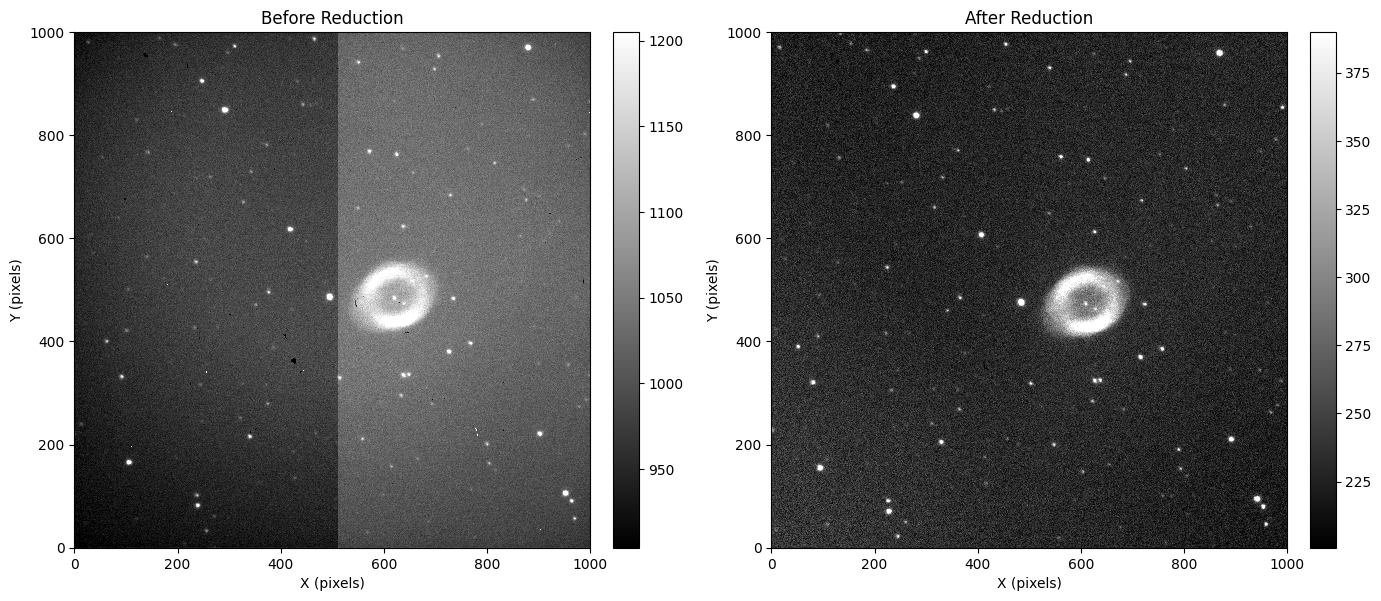

In [ ]:
from matplotlib.colorbar import Colorbar

# Load the images
image_after = fits.getdata('/content/V_20240419_0054.fits').astype(np.double)
image_before = fits.getdata('/content/drive/MyDrive/M57/20240419/20240419_0054.fits').astype(np.double)

# Create a figure with side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the "before" image
im_before = axes[0].imshow(image_before, origin='lower',
                           vmin=np.percentile(image_before, 0.5),
                           vmax=np.percentile(image_before, 99.7),
                           interpolation='nearest', cmap='gray')
axes[0].set_title('Before Reduction')
axes[0].set_xlabel('X (pixels)')
axes[0].set_ylabel('Y (pixels)')
axes[0].set_xlim(0, 1000)
axes[0].set_ylim(0, 1000)  # Start from zero at the bottom

# Add colorbar for "before" image
cbar_before = fig.colorbar(im_before, ax=axes[0], fraction=0.046, pad=0.04)

# Plot the "after" image
im_after = axes[1].imshow(image_after, origin='lower',
                          vmin=np.percentile(image_after, 0.5),
                          vmax=np.percentile(image_after, 99.7),
                          interpolation='nearest', cmap='gray')
axes[1].set_title('After Reduction')
axes[1].set_xlabel('X (pixels)')
axes[1].set_ylabel('Y (pixels)')
axes[1].set_xlim(0, 1000)
axes[1].set_ylim(0, 1000)  # Start from zero at the bottom

# Add colorbar for "after" image
cbar_after = fig.colorbar(im_after, ax=axes[1], fraction=0.046, pad=0.04)

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('Comparison Plot', format='png')
plt.show()

In [ ]:
# Initialize Astrometry.net client
ast = AstrometryNet()
ast.api_key = 'ilqvzsvwmibpwktk'  # Get an API key from Astrometry.net

# Directory containing the reduced FITS files
reduced_dir = '/content/'  # Assuming 'outdir' is where the reduced files are saved

# List of reduced files
reduced_files = [f for f in os.listdir(reduced_dir) if f.endswith('.fits') and f.startswith(filter_name)]

# Loop through the reduced files and add WCS
for filename in reduced_files:
    file_path = os.path.join(reduced_dir, filename)
    print(f"Processing WCS for: {file_path}")

    try:
        # Submit the FITS file for WCS calibration
        wcs_header = ast.solve_from_image(file_path, force_image_upload=True)

        # Update the FITS header with WCS information
        with fits.open(file_path, mode='update') as hdul:
            hdul[0].header.update(wcs_header)
            hdul.flush()

        print(f"WCS coordinates added successfully for {filename}!")

    except Exception as e:
        print(f"Failed to add WCS to {filename}: {e}")


Processing WCS for: /content/V_20240419_0054.fits
Solving........WCS coordinates added successfully for V_20240419_0054.fits!


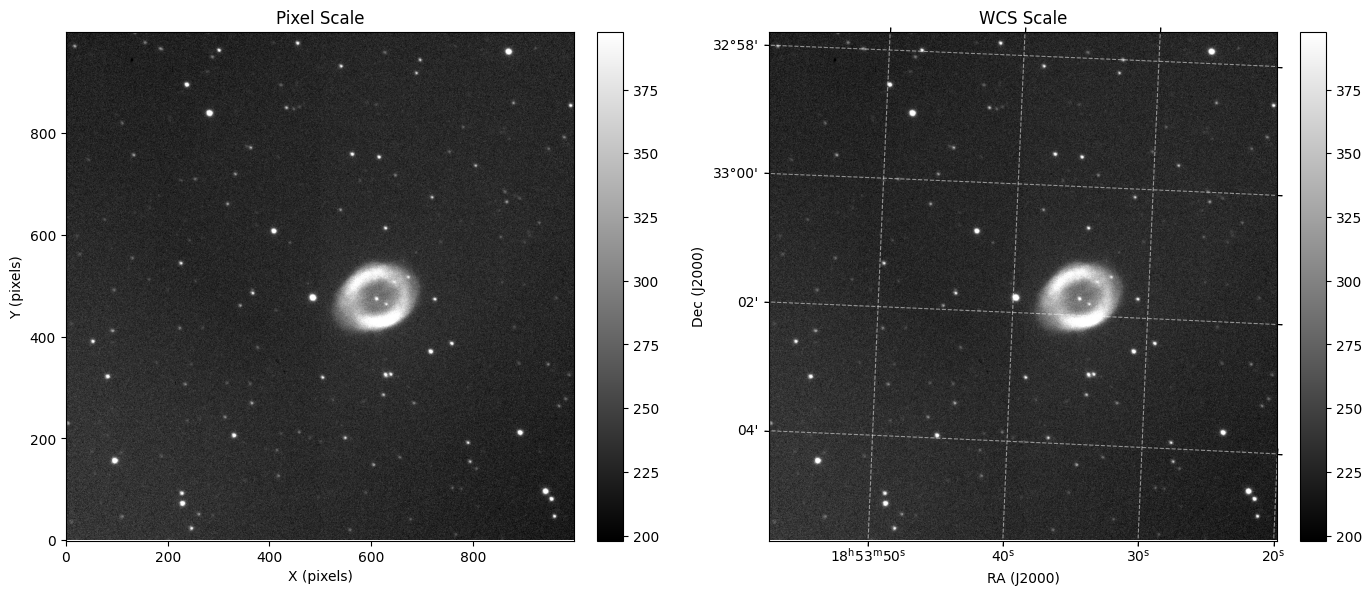

In [ ]:
# Load the FITS file and get the data and WCS
new_filename = '/content/V_20240419_0054.fits'
with fits.open(new_filename) as hdul:
    data = hdul[0].data
    wcs = WCS(hdul[0].header)

# Normalize the image data for better visualization
norm = ImageNormalize(data, interval=PercentileInterval(99.5))  # Adjust percentile as needed

# Create a figure with side-by-side subplots
fig = plt.figure(figsize=(14, 6))

# Plot in pixel scale (left)
ax1 = fig.add_subplot(1, 2, 1)
im1 = ax1.imshow(data, cmap='gray', norm=norm, origin='lower')
ax1.set_title("Pixel Scale")
ax1.set_xlabel("X (pixels)")
ax1.set_ylabel("Y (pixels)")
fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

# Plot in WCS scale (right)
ax2 = fig.add_subplot(1, 2, 2, projection=wcs)  # Explicitly set WCS projection
im2 = ax2.imshow(data, cmap='gray', norm=norm, origin='lower')
ax2.set_title("WCS Scale")
ax2.coords.grid(color='white', ls='--', alpha=0.5)  # Add WCS grid
ax2.coords[0].set_axislabel("RA (J2000)")
ax2.coords[1].set_axislabel("Dec (J2000)")
fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('Pixel_vs_WCS', format='png')
plt.show()